# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: The PCA algorithm looks for correlation among features captures the priciple axes of variation. This means it finds large general trends in the data. For this dataset, the first principle axis PCA identifies could be total annual spending, separating large buyers from small ones. ICA focuses more on specific features that are idependent of one another, like perhaps spending on edible vs non-edible items. 

###PCA

In [21]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
#print pca.explained_variance_ratio_

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]


In [22]:
pca.explained_variance_ratio_

array([ 0.45961362,  0.40517227,  0.07003008,  0.04402344,  0.01502212,
        0.00613848])

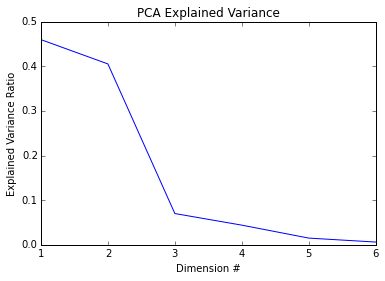

In [32]:
# plot variance explained by each dimension
X = np.linspace(1,6,6)
y = pca.explained_variance_ratio_
plt.plot(X,y)
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Dimension #")
plt.title("PCA Explained Variance")

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: The variance drops off steeply after the second dimension. I would choose 2 dimensions when using PCA on this dataset, using a cutoff of 10% of the variance explained. I could also see an argument made for using the first three dimensions, using a cutoff of 5%.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: The first dimension seems to represent simply annual spending on fresh products, with a large weight of -0.97 on that feature. It also seems to distinguish between edible and non-edible categories, placing a negative weight on all edible ones, and a positive weight on the sole inedbile category, Detergents_paper.

The second dimensions has the largest weights on the Milk, Grocery, and Frozen features, at 0.52, 0.51, and -0.65 respectively. This dimension seems to be capturing, then, amount spent on these three features (the next three largest edible foods categories) not including Fresh, which was already captured in the first component. 

###ICA

In [63]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn.preprocessing import scale

numpy_matrix = data.as_matrix().astype(float)

scaled_data = scale(numpy_matrix)

In [64]:
df = pd.DataFrame(scaled_data)
df.head()

,0,1,2,3,4,5
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [65]:
scaled_data.mean(axis=0)

array([ -2.42230478e-17,  -1.58963751e-17,  -6.03052961e-17,
         1.13545537e-17,  -1.91765795e-17,  -8.27620800e-17])

In [66]:
scaled_data.std(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.])

In [67]:
ica = FastICA()
ica.fit(scaled_data)

# Print the independent components
print ica.components_

[[-0.0024585   0.01318271 -0.06934193 -0.00143115  0.01345001  0.00519396]
 [ 0.05025609 -0.00656261 -0.00692263 -0.00322603  0.0109977  -0.00277013]
 [-0.00349912  0.01903032  0.10893845 -0.00723622 -0.13336854 -0.01611353]
 [ 0.01091516  0.00106912 -0.00737216 -0.05405843  0.00257362  0.01681107]
 [ 0.00207553  0.07219012 -0.05638122 -0.00163869  0.01780466 -0.01687627]
 [-0.00488602 -0.00161585 -0.00558681 -0.00247652  0.0024177   0.05093185]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: Since the features in this datset come from the buying behavior of stores, the components of the ICA likely capture different types of stores.

The first component of ICA weights the 2nd, 3rd, and 5th features most heavily, which are the Milk, Grocery, and Detergents_Paper features respectively. This could represent a convenience store with some groceries, a fridge with milk, and non-edible household supplies. 

The second component weights the Fresh and Detergents_paper features most heavily, which could represent a normal supermarket that features a large produce section and lots of non-edible goods as well.

The third component has similar weights to the first component, though it has a noticeably larger weight of -0.13 on the Detergents_Paper feature. This likely captures buyers that maybe have some food products but mostly sell non-edible goods (like a drug store).

Skipping to the last component, it's heaviest weight of 0.051 is on the Delicatessen feature, and this is straightforward, captures buyers that are delis.

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: The K Means algorithm uses hard assignment, meaning every point is assigned to a cluster at every iteration. This is in contrast to a GMM which uses soft assignment, meaning points are given probabilities of belonging to a cluster.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [33]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [34]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


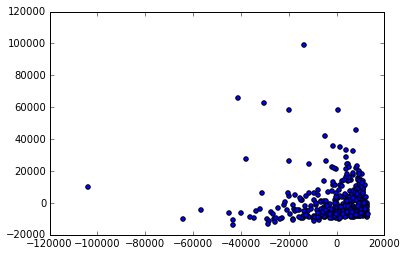

In [51]:
plt.scatter(reduced_data[:,0], reduced_data[:,1])


In [35]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
kmeans = KMeans(n_clusters=2)

clusters = kmeans.fit(reduced_data)
print clusters

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [36]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [37]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = kmeans.cluster_centers_
print centroids

[[-24088.33276689   1218.17938291]
 [  4175.31101293   -211.15109304]]


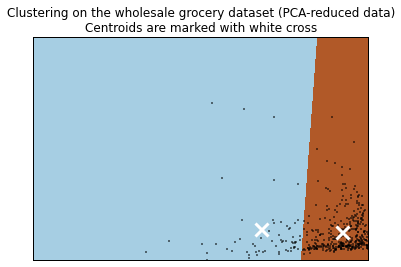

In [38]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: 

**9)** How would you use that technique to help the company design new experiments?

Answer: 

**10)** How would you use that data to help you predict future customer needs?

Answer: 